In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

from torchsummary import summary

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [6]:
class AlexNet_CryptGPU(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_CryptGPU, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=9),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(num_features=96),

            nn.Conv2d(96, 256, kernel_size=5, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.BatchNorm2d(num_features=256),
            
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        if num_classes == 10:
            self.fc_layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 10),
            )
        elif num_classes == 200:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=2),
                nn.Flatten(),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 200),
            )
        elif num_classes == 1000:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=4),
                nn.Flatten(),
                nn.Linear(9216, 4096),
                nn.ReLU(),
                nn.Linear(4096, 4096),
                nn.ReLU(),
                nn.Linear(4096, 1000),
            )

    def forward(self, x):
        x = self.features(x)
        x = self.fc_layers(x)
        return x
    
class AlexNet_Falcon(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Falcon, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=9),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(num_features=96),

            nn.Conv2d(96, 256, kernel_size=5, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(num_features=256),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        if num_classes == 10:
            self.fc_layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 256),
                nn.ReLU(inplace=True),
                nn.Linear(256, 10),
                # nn.ReLU(inplace=True),
            )
        elif num_classes == 200:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=2),
                nn.Flatten(),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 200),
            )
        elif num_classes == 1000:
            self.fc_layers = nn.Sequential(
                nn.AvgPool2d(kernel_size=4),
                nn.Flatten(),
                nn.Linear(9216, 4096),
                nn.ReLU(),
                nn.Linear(4096, 4096),
                nn.ReLU(),
                nn.Linear(4096, 1000),
            )

    def forward(self, x):
        x = self.features(x)
        x = self.fc_layers(x)
        return x

class AlexNet_Official(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Official, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x
    
class AlexNet_Official_modify(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_Official_modify, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=7, stride=2, padding=2),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            # nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            # nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

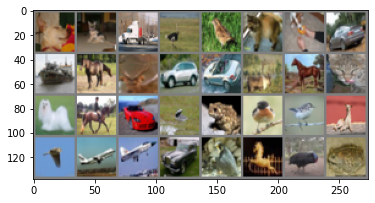

  dog   dog truck  bird


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
from tensorboardX import SummaryWriter
logger = SummaryWriter(log_dir = 'log')


model = AlexNet_CryptGPU(num_classes=10)
summary(model, (3, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) 
# AlexNet Official
# lr=0.001, momentum=0.9 converges about 2~3 epoch. Without momentum, it does not converge.
# lr=0.01 (remove Dropout) converges about 3~4 epoch.

# AlexNet Official Modified: MaxPooling --> AvgPooing, remove Dropout
# lr=0.01 converges

# AlexNet CryptGPU
# lr=0.01. momentum=0.9 not converge. No BN, remove the last avgpooling layer.

# AlexNet Falcon
# lr=0.01 converges

dataiter = iter(trainloader)
# images, labels = dataiter.next()
it = 2
for epoch in range(it):
    for batch, data in enumerate(trainloader, 0):
        images, labels = data
        output = model(images)

        # MSEloss
        # one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=10).float()
        optimizer.zero_grad()
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        if batch % 100 == 0:
            print('Epoch: {}, Batch {}, Loss: {}'.format(epoch, batch, loss.item()))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 10, 10]          34,944
              ReLU-2           [-1, 96, 10, 10]               0
         MaxPool2d-3             [-1, 96, 4, 4]               0
       BatchNorm2d-4             [-1, 96, 4, 4]             192
            Conv2d-5            [-1, 256, 2, 2]         614,656
              ReLU-6            [-1, 256, 2, 2]               0
         MaxPool2d-7            [-1, 256, 1, 1]               0
       BatchNorm2d-8            [-1, 256, 1, 1]             512
            Conv2d-9            [-1, 384, 1, 1]         885,120
             ReLU-10            [-1, 384, 1, 1]               0
           Conv2d-11            [-1, 384, 1, 1]       1,327,488
             ReLU-12            [-1, 384, 1, 1]               0
           Conv2d-13            [-1, 256, 1, 1]         884,992
             ReLU-14            [-1, 25

In [9]:
test_sss = iter(testloader)
images, labels = test_sss.next()
images, labels = test_sss.next()
output = model(images)
_, output = torch.max(output, 1)

correct = 0
for i in range(len(output)):
    if output[i] == labels[i]:
        correct += 1
print(f"acc: {correct * 1. / 128}")
print(f"Output: ${output}")
print(f"Target: ${labels}")

acc: 0.5703125
Output: $tensor([3, 0, 4, 1, 8, 9, 1, 2, 9, 7, 2, 1, 6, 5, 6, 3, 8, 7, 3, 6, 2, 2, 1, 9,
        3, 4, 0, 6, 3, 9, 3, 4, 2, 1, 6, 6, 0, 2, 8, 3, 2, 0, 9, 4, 1, 8, 9, 9,
        3, 7, 3, 0, 0, 7, 6, 3, 4, 8, 6, 2, 3, 8, 2, 8, 0, 1, 7, 3, 9, 3, 7, 3,
        5, 1, 8, 7, 1, 3, 0, 5, 7, 1, 6, 0, 3, 7, 8, 2, 7, 9, 3, 2, 4, 6, 9, 5,
        3, 9, 3, 2, 3, 3, 5, 1, 2, 1, 8, 0, 4, 4, 5, 2, 1, 1, 1, 9, 0, 8, 1, 8,
        2, 0, 4, 3, 9, 9, 6, 7])
Target: $tensor([5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9,
        6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9,
        3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8,
        5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4,
        3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9,
        2, 2, 5, 3, 9, 9, 4, 0])


# Save Pretrained Parameters

In [18]:
params = [(name, p.data.cpu().numpy()) for (name, p) in model.named_parameters()]

for (name, p) in params:
    print(name)
    print(f"Layer {str(name.split('.')[0])+'.'+str(name.split('.')[1])}, type {name.split('.')[2]}, shape {p.shape}")

features.0.weight
Layer features.0, type weight, shape (96, 3, 11, 11)
features.0.bias
Layer features.0, type bias, shape (96,)
features.3.weight
Layer features.3, type weight, shape (96,)
features.3.bias
Layer features.3, type bias, shape (96,)
features.4.weight
Layer features.4, type weight, shape (256, 96, 5, 5)
features.4.bias
Layer features.4, type bias, shape (256,)
features.7.weight
Layer features.7, type weight, shape (256,)
features.7.bias
Layer features.7, type bias, shape (256,)
features.8.weight
Layer features.8, type weight, shape (384, 256, 3, 3)
features.8.bias
Layer features.8, type bias, shape (384,)
features.10.weight
Layer features.10, type weight, shape (384, 384, 3, 3)
features.10.bias
Layer features.10, type bias, shape (384,)
features.12.weight
Layer features.12, type weight, shape (256, 384, 3, 3)
features.12.bias
Layer features.12, type bias, shape (256,)
fc_layers.1.weight
Layer fc_layers.1, type weight, shape (256, 256)
fc_layers.1.bias
Layer fc_layers.1, typ

In [19]:
path = "../files/preload/AlexNet/CIFAR10/"
np.savetxt(fname=path+"cnn1_weight_0", delimiter=" ", X=params[0][1].reshape(3*11*11, 96).tolist())
np.savetxt(fname=path+"cnn1_bias_0", delimiter=" ",  X=params[1][1].tolist())
np.savetxt(fname=path+"bn1_gamma_0", delimiter=" ",  X=params[2][1].tolist())
np.savetxt(fname=path+"bn1_beta_0", delimiter=" ",  X=params[3][1].tolist())
np.savetxt(fname=path+"cnn2_weight_0", delimiter=" ", X=params[4][1].reshape(96*5*5, 256).tolist())
np.savetxt(fname=path+"cnn2_bias_0", delimiter=" ", X=params[5][1].tolist())
np.savetxt(fname=path+"bn2_gamma_0", delimiter=" ",  X=params[6][1].tolist())
np.savetxt(fname=path+"bn2_beta_0", delimiter=" ",  X=params[7][1].tolist())
np.savetxt(fname=path+"cnn3_weight_0", delimiter=" ", X=params[8][1].reshape(256*3*3, 384).tolist())
np.savetxt(fname=path+"cnn3_bias_0", delimiter=" ", X=params[9][1].tolist())
np.savetxt(fname=path+"cnn4_weight_0", delimiter=" ", X=params[10][1].reshape(384*3*3, 384).tolist())
np.savetxt(fname=path+"cnn4_bias_0", delimiter=" ", X=params[11][1].tolist())
np.savetxt(fname=path+"cnn5_weight_0", delimiter=" ", X=params[12][1].reshape(384*3*3, 256).tolist())
np.savetxt(fname=path+"cnn5_bias_0", delimiter=" ", X=params[13][1].tolist())
# FC
np.savetxt(fname=path+"fc1_weight_0", delimiter=" ", X=params[14][1].tolist())
np.savetxt(fname=path+"fc1_bias_0", delimiter=" ", X=params[15][1].tolist())
np.savetxt(fname=path+"fc2_weight_0", delimiter=" ", X=params[16][1].tolist())
np.savetxt(fname=path+"fc2_bias_0", delimiter=" ", X=params[17][1].tolist())
np.savetxt(fname=path+"fc3_weight_0", delimiter=" ", X=params[18][1].tolist())
np.savetxt(fname=path+"fc3_bias_0", delimiter=" ", X=params[19][1].tolist())

# Batch Normalization Pseudocode

In [11]:
import math

IT_N = 3
def inverse_sqrt(x):
    init_g = np.exp(-(x/2+0.2))*2 + 0
    init_g -= x/1024

    for i in range(IT_N):
        init_g = init_g*(3-x * init_g * init_g)/2
    return init_g
    
class BN:
    def __init__(self, dims, gamma=0, beta=0):
        print('BN')
        self.eps = 1e-5
        self.gamma = np.ones((dims, ), dtype="float32")
        self.beta = np.zeros((dims, ), dtype="float32")
        
        self.inv_sqrt = None
        self.norm_x = None

        self.beta_grad = None
        self.gamma_grad = None
        self.act_grad = None

    def forward(self, x):
        mean = np.mean(x, axis=0)   # 1 truncation by batchSize [1, D]
        x_mean = x - mean   # [B, D]
        var = np.mean(x_mean * x_mean, axis=0)  # 1 multiplication, 1 truncation by batchsize [1, D]
        var_eps = var + self.eps

        # protocol inv_sqrt
        self.inv_sqrt = 1. / np.sqrt(var_eps)   # 1 inverse sqrt [1, D]
        # print("======")
        # print(var_eps)
        # print(self.inv_sqrt)
        # print(inverse_sqrt(var_eps))
        self.norm_x = x_mean * self.inv_sqrt    # 1 multiplication [B, D] * [1, D]. Falcon here has bug.
        print(self.inv_sqrt)
        print(self.norm_x)

        return self.gamma * self.norm_x + self.beta     # 1 multiplication

    def backward(self, grad):
        B, D = grad.shape
        self.beta_grad = np.sum(grad, axis=0)
        self.gamma_grad = np.sum(self.norm_x * grad, axis=0)    # 1 multiplication

        dxhat = grad * self.gamma   # 1 multiplication

        print('+' * 20)
        print(B*dxhat)
        # print(np.sum(dxhat, axis=0))
        # print(np.sum(dxhat * self.norm_x, axis=0))
        # print(self.norm_x * np.sum(dxhat * self.norm_x, axis=0))
        print((B*dxhat - np.sum(dxhat, axis=0) - self.norm_x * np.sum(dxhat * self.norm_x, axis=0)))
        self.act_grad = self.inv_sqrt * \
                        (B*dxhat - np.sum(dxhat, axis=0) - self.norm_x * np.sum(dxhat * self.norm_x, axis=0)) \
                        / B # 3 multiplication, 1 truncation

        return self.act_grad, self.gamma_grad, self.beta_grad

bn = BN(5)

data = np.array([[1, 2, 3, 4, 5],
                 [1, 3, 5, 7, 8],
                 [1, 2, 3, 6, 6],
                 [1, 2, 4, 5, 6]]).astype(np.float32)
x_raw = torch.from_numpy(data)
x = x_raw.numpy()

grad = np.array([[1, 2, 3, 4, 5],
                 [1, 3, 5, 7, 8],
                 [1, 2, 3, 6, 6],
                 [1, 2, 4, 5, 6]]).astype(np.float32)
# grad = grad * 1024

print("forward")
f_o = bn.forward(x)
print(f_o)

print("backward")
b_o = bn.backward(grad)
print(b_o)

print(inverse_sqrt(np.array([16, 100, 0.01])))

BN
forward
[316.22778      2.3093395    1.2060366    0.89442366   0.9176591 ]
[[ 0.         -0.5773349  -0.9045274  -1.3416355  -1.1470739 ]
 [ 0.          1.7320046   1.5075457   1.3416355   1.6059034 ]
 [ 0.         -0.5773349  -0.9045274   0.44721183 -0.22941478]
 [ 0.         -0.5773349   0.30150914 -0.44721183 -0.22941478]]
[[ 0.         -0.5773349  -0.9045274  -1.3416355  -1.1470739 ]
 [ 0.          1.7320046   1.5075457   1.3416355   1.6059034 ]
 [ 0.         -0.5773349  -0.9045274   0.44721183 -0.22941478]
 [ 0.         -0.5773349   0.30150914 -0.44721183 -0.22941478]]
backward
++++++++++++++++++++
[[ 4.  8. 12. 16. 20.]
 [ 4. 12. 20. 28. 32.]
 [ 4.  8. 12. 24. 24.]
 [ 4.  8. 16. 20. 24.]]
[[ 0.0000000e+00 -5.3286552e-05 -4.3869019e-05 -4.8160553e-05
  -4.1961670e-05]
 [ 0.0000000e+00  1.5997887e-04  7.2956085e-05  4.8160553e-05
   5.9127808e-05]
 [ 0.0000000e+00 -5.3286552e-05 -4.3869019e-05  1.5974045e-05
  -8.4042549e-06]
 [ 0.0000000e+00 -5.3286552e-05  1.4603138e-05 -1.597

In [13]:
class MyBN:
    def __init__(self, momentum, eps, num_features):
        """
        初始化参数值
        :param momentum: 追踪样本整体均值和方差的动量
        :param eps: 防止数值计算错误
        :param num_features: 特征数量
        """
        # 对每个batch的mean和var进行追踪统计
        self._running_mean = 0
        self._running_var = 1
        # 更新self._running_xxx时的动量
        self._momentum = momentum
        # 防止分母计算为0
        self._eps = eps
        # 对应论文中需要更新的beta和gamma，采用pytorch文档中的初始化值
        self._beta = np.zeros(shape=(num_features, ))
        self._gamma = np.ones(shape=(num_features, ))

    def batch_norm(self, x):
        """
        BN向传播
        :param x: 数据
        :return: BN输出
        """
        x_mean = x.mean(axis=0)
        x_var = x.var(axis=0)
        # 对应running_mean的更新公式
        self._running_mean = (1-self._momentum)*x_mean + self._momentum*self._running_mean
        self._running_var = (1-self._momentum)*x_var + self._momentum*self._running_var
        # 对应论文中计算BN的公式
        x_hat = (x-x_mean)/np.sqrt(x_var+self._eps)
        y = self._gamma*x_hat + self._beta
        return y

my_bn = MyBN(momentum=0.01, eps=1e-5, num_features=5)
bn_output = my_bn.batch_norm(x)
print(bn_output)

[[ 0.         -0.57733488 -0.90452743 -1.34163547 -1.14707386]
 [ 0.          1.73200464  1.50754571  1.34163547  1.60590339]
 [ 0.         -0.57733488 -0.90452743  0.44721183 -0.22941478]
 [ 0.         -0.57733488  0.30150914 -0.44721183 -0.22941478]]


In [14]:

def batchnorm_forward(x, gamma, beta, eps):
    # read some useful parameter
    N, D = x.shape

    # BN forward pass
    sample_mean = x.mean(axis=0)
    sample_var = x.var(axis=0)
    x_ = (x - sample_mean) / np.sqrt(sample_var + eps)
    out = gamma * x_ + beta

    # storage variables for backward pass
    cache = (x_, gamma, x - sample_mean, sample_var + eps)

    return out, cache


def batchnorm_backward(dout, cache):
    # extract variables
    N, D = dout.shape
    x_, gamma, x_minus_mean, var_plus_eps = cache

    # calculate gradients
    dgamma = np.sum(x_ * dout, axis=0)
    dbeta = np.sum(dout, axis=0)

    dx_ = np.matmul(np.ones((N,1)), gamma.reshape((1, -1))) * dout
    dx = N * dx_ - np.sum(dx_, axis=0) - x_ * np.sum(dx_ * x_, axis=0)
    dx *= (1.0/N) / np.sqrt(var_plus_eps)

    return dx, dgamma, dbeta

gamma = np.ones((5, ), dtype="float32")
beta = np.zeros((5, ), dtype="float32")
f_o, cache = batchnorm_forward(x, gamma, beta, 1e-5)
print('forward', f_o)

grad = np.ones((3, 5), dtype='float32')
dx, dgamma, dbeta = batchnorm_backward(grad, cache)
print(dx)
print(dgamma)
print(dbeta)

forward [[ 0.         -0.5773349  -0.9045274  -1.3416355  -1.1470739 ]
 [ 0.          1.7320046   1.5075457   1.3416355   1.6059034 ]
 [ 0.         -0.5773349  -0.9045274   0.44721183 -0.22941478]
 [ 0.         -0.5773349   0.30150914 -0.44721183 -0.22941478]]


ValueError: operands could not be broadcast together with shapes (4,5) (3,5) 

In [4]:
from scipy.special import softmax
x = np.array([
    [2.60365, -0.290006, -0.721366, 0.507656, -0.434107, -0.595984, 0.532808, -0.0694342, -0.377345, -0.0523729],
    [-0.124932, 0.807279, -0.534957, -0.0588999, 0.0464973, -0.855241, 0.116036, 0.219089, 0.0108147, 0.756191],
    [0.41907, 0.301184, -0.434992, 0.190973, 0.18747, -0.639831, 0.21955, 0.151983, -0.169142, 0.523242]
    ])

m = softmax(x, axis=1)
m

array([[0.61762686, 0.0342001 , 0.02221724, 0.07593597, 0.02961045,
        0.02518505, 0.07787013, 0.04264032, 0.03133982, 0.04337406],
       [0.07585606, 0.19268342, 0.05034063, 0.08103407, 0.09004115,
        0.03654442, 0.09652534, 0.10700318, 0.0868849 , 0.18308683],
       [0.13332502, 0.11849893, 0.0567541 , 0.10613299, 0.10576185,
        0.04624202, 0.1092097 , 0.1020745 , 0.07403796, 0.14796295]])